# Main Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import re
import os

# import data
file_cell_based_1x = os.path.join("..", "clean-files", "UL", "throughput", "Cell-based-1ue.txt")
file_cell_free_1x = os.path.join("..", "clean-files", "UL", "throughput", "Cell-free-1ue.txt")

## Calculations for 1X Scenarios

In [11]:
# Read content of the file
with open(file_cell_based_1x, 'r') as f:
    raw_data_cb_1x = f.read()

# Regex to extract throughput values
throughput_values_cb_1x = [float(val) for val in re.findall(r"Throughput\s*=\s*([\d\.]+)", raw_data_cb_1x)]

# Create a DataFrame
df_cb_1x = pd.DataFrame({
    "Time (ms)": [i * 10 for i in range(len(throughput_values_cb_1x))],
    "Throughput (Mbps)": throughput_values_cb_1x
})


# Read content of the file
with open(file_cell_free_1x, 'r') as f:
    raw_data_cf_1x = f.read()

# Regex to extract throughput values
throughput_values_cf_1x = [float(val) for val in re.findall(r"Throughput\s*=\s*([\d\.]+)", raw_data_cf_1x)]

# Create a DataFrame
df_cf_1x = pd.DataFrame({
    "Time (ms)": [i * 10 for i in range(len(throughput_values_cf_1x))],
    "Throughput (Mbps)": throughput_values_cf_1x
})

## Cell-Based 1x UE Throughput x Time

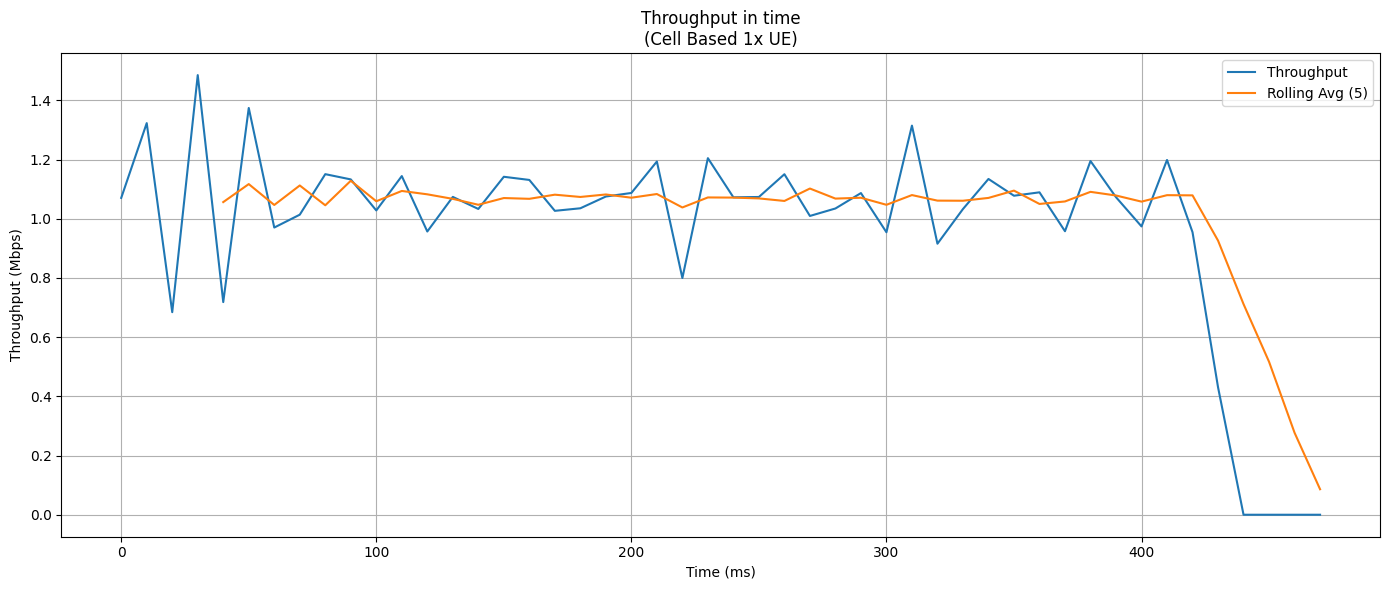

In [12]:
# Calculate rolling average with a window of 5
df_cb_1x["Rolling Avg (Mbps)"] = df_cb_1x["Throughput (Mbps)"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time (ms)", y="Throughput (Mbps)", data=df_cb_1x, label="Throughput")
sns.lineplot(x="Time (ms)", y="Rolling Avg (Mbps)", data=df_cb_1x, label="Rolling Avg (5)")
plt.title("Throughput in time\n(Cell Based 1x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Cell-Free 1x UE Throughput x Time

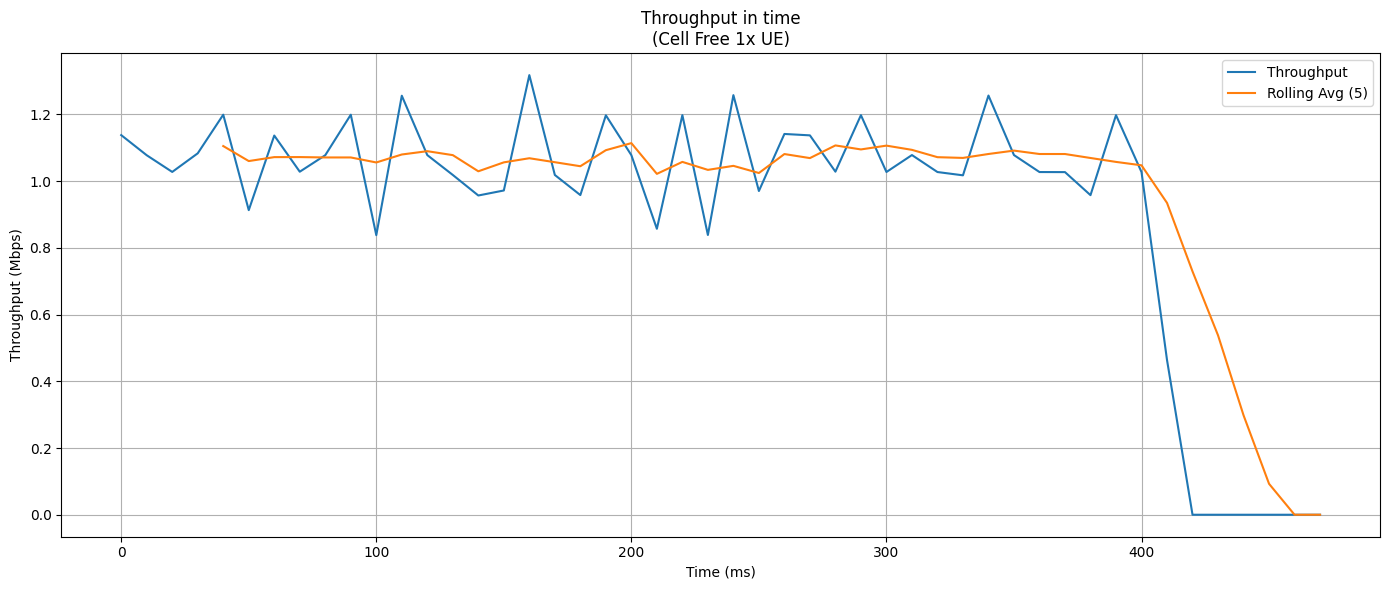

In [13]:

# Calculate rolling average with a window of 5
df_cf_1x["Rolling Avg (Mbps)"] = df_cf_1x["Throughput (Mbps)"].rolling(window=5).mean()

# Grafic of Throughput and Rolling Average 
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time (ms)", y="Throughput (Mbps)", data=df_cf_1x, label="Throughput")
sns.lineplot(x="Time (ms)", y="Rolling Avg (Mbps)", data=df_cf_1x, label="Rolling Avg (5)")
plt.title("Throughput in time\n(Cell Free 1x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Main statistics 1X Scenarios

### Cell-Based

In [14]:
print(df_cb_1x["Throughput (Mbps)"].describe())

count    48.000000
mean      0.970468
std       0.340824
min       0.000000
25%       0.957575
50%       1.071355
75%       1.136218
max       1.485200
Name: Throughput (Mbps), dtype: float64


### Cell-Free

In [15]:
print(df_cf_1x["Throughput (Mbps)"].describe())

count    48.000000
mean      0.924753
std       0.379399
min       0.000000
25%       0.957860
50%       1.027625
75%       1.137547
max       1.317980
Name: Throughput (Mbps), dtype: float64
